# Dados e Aprendizagem Automática
## Produção Energética e Sustentabilidade


**Dataset:** .csv

**Problema:** Prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas, a cada hora do dia.
___
**Features dos Datasets de Energia:**

* Data - o timestamp associado ao registo, ao dia;
* Hora - a hora associada ao registo;
* Normal (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
* Horário Económico (kWh) - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
* Autoconsumo (kWh) - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
* Injeção na rede (kWh) - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

**Features dos Datasets Meteorológicos:**

* dt - o timestamp associado ao registo;
* dt_iso - a data associada ao registo, ao segundo;
* city_name - o local em causa;
* temp - temperatura em ºC;
* feels_like - sensação térmica em ºC;
* temp_min - temperatura mínima sentida em ºC;
* temp_max - temperatura máxima sentida em ºC;
* pressure - pressão atmosférica sentida em atm;
* sea_level - pressão atmosférica sentida ao nível do mar em atm;
* grnd_level - pressão atmosférica sentida à altitude local em atm;
* humidity - humidade em percentagem;
* wind_speed - velocidade do vento em metros por segundo;
* rain_1h - valor médio de precipitação;
* clouds_all - nível de nebulosidade em percentagem;
* weather_description - avaliação qualitativa do estado do tempo.

___
**Grupo:**
- João Paulo Machado Abreu - pg53928
- João Pedro Dias Faria - pg53939
- Ricardo Cardoso Sousa - pg54179
- Rui Pedro Guise da Silva - pg54213


### Importar Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone
%matplotlib inline

##### Concat dos dois datasets para treino da energia

In [9]:
df1 = pd.read_csv('./datasets/competicao/energia_202109-202112.csv')
df2 = pd.read_csv('./datasets/competicao/energia_202201-202212.csv')

stacked_df = pd.concat([df1, df2], ignore_index=True)
stacked_df.to_csv('./datasets/competicao/energia_train.csv', index=False)

##### Adicionar uma coluna com o timestamp em segundos

In [12]:
df3 = pd.read_csv('./datasets/competicao/energia_train.csv')

df3['dt'] = pd.to_datetime(df3['Data'] + ' ' + df3['Hora'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')

def create_timestamp(row):
    timestamp_str = str(row['dt'])
    timestamp= datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    timestamp_utc = timestamp.replace(tzinfo=timezone.utc)
    return int(timestamp_utc.timestamp())

df3['dt'] = df3.apply(create_timestamp, axis=1)
df3.to_csv('./datasets/competicao/energia_train.csv', index=False)

##### Concat dos dois datasets para treino da meteorologia

In [2]:
df4 = pd.read_csv('./datasets/competicao/meteo_202109-202112.csv')
df5 = pd.read_csv('./datasets/competicao/meteo_202201-202212.csv')

stacked_df2 = pd.concat([df4, df5], ignore_index=True)
stacked_df2.to_csv('./datasets/competicao/meteo_train.csv', index=False)

##### Remover todas as linhas com timestamps anteriores a 29-09-2021 00:00:00

In [14]:
threshold_date = 1632870000
df6 = pd.read_csv('./datasets/competicao/meteo_train.csv')
df6 = df6[df6['dt']> threshold_date]

df6.to_csv('./datasets/competicao/meteo_train.csv', index=False)


##### Join do dataset de energia com o de meteorologia

In [15]:
dataset1 = pd.read_csv('./datasets/competicao/energia_train.csv')

dataset2 = pd.read_csv('./datasets/competicao/meteo_train.csv')

merged_dataset = pd.merge(dataset1, dataset2, left_on='dt', right_on='dt', how='inner')

merged_dataset.to_csv('./datasets/competicao/energia_meteo_train.csv', index=False)

### Exploração e Visualização dos dados

In [5]:
em = pd.read_csv('./datasets/competicao/energia_meteo_train.csv')
em

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),dt,dt_iso,city_name,temp,...,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.000,0.000,0.0,NaN,1632873600,2021-09-29 00:00:00 +0000 UTC,local,13.97,...,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.000,0.000,0.0,NaN,1632877200,2021-09-29 01:00:00 +0000 UTC,local,13.48,...,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.000,0.000,0.0,NaN,1632880800,2021-09-29 02:00:00 +0000 UTC,local,12.93,...,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.000,0.000,0.0,NaN,1632884400,2021-09-29 03:00:00 +0000 UTC,local,12.61,...,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.000,0.000,0.0,NaN,1632888000,2021-09-29 04:00:00 +0000 UTC,local,12.61,...,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,1.693,0.000,0.0,NaN,1672513200,2022-12-31 19:00:00 +0000 UTC,local,15.70,...,15.57,15.72,1018,NaN,NaN,86,5.56,3.58,100,moderate rain
11012,2022-12-31,20,1.327,0.000,0.0,NaN,1672516800,2022-12-31 20:00:00 +0000 UTC,local,15.55,...,12.72,15.70,1018,NaN,NaN,87,4.47,4.20,100,heavy intensity rain
11013,2022-12-31,21,0.757,0.000,0.0,NaN,1672520400,2022-12-31 21:00:00 +0000 UTC,local,13.45,...,12.23,13.99,1019,NaN,NaN,93,3.29,4.23,100,heavy intensity rain
11014,2022-12-31,22,0.000,0.675,0.0,NaN,1672524000,2022-12-31 22:00:00 +0000 UTC,local,12.93,...,12.23,13.43,1019,NaN,NaN,94,1.49,3.90,100,moderate rain


In [6]:
em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
 6   dt                       11016 non-null  int64  
 7   dt_iso                   11016 non-null  object 
 8   city_name                11016 non-null  object 
 9   temp                     11016 non-null  float64
 10  feels_like               11016 non-null  float64
 11  temp_min                 11016 non-null  float64
 12  temp_max                 11016 non-null  float64
 13  pressure                 11016 non-null  int64  
 14  sea_level             

<Axes: >

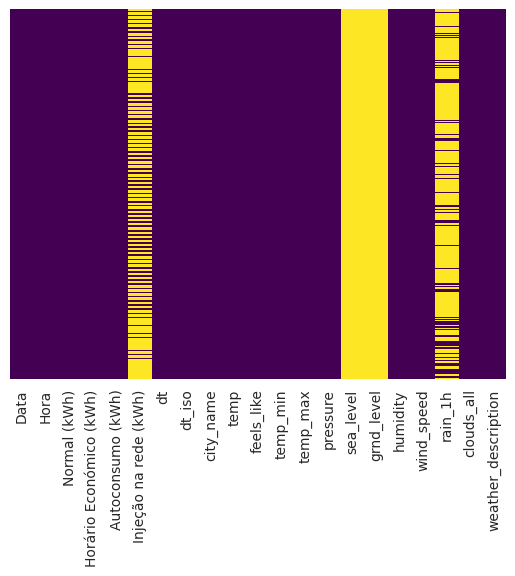

In [7]:

sns.heatmap(em.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [8]:
print(em.isna().sum())

Data                           0
Hora                           0
Normal (kWh)                   0
Horário Económico (kWh)        0
Autoconsumo (kWh)              0
Injeção na rede (kWh)       7777
dt                             0
dt_iso                         0
city_name                      0
temp                           0
feels_like                     0
temp_min                       0
temp_max                       0
pressure                       0
sea_level                  11016
grnd_level                 11016
humidity                       0
wind_speed                     0
rain_1h                     8732
clouds_all                     0
weather_description            0
dtype: int64


#### Drop de colunas

Vamos remover as colunas sea_level e grnd_level devido as mesmas não conterem dados.
Vamos remover as colunas dt_iso e dt por não conterem dados essenciais para o problema

In [18]:
# Estou a colocar num dataframe diferente para não estragar o inicial
em1 = em.copy()
em1.drop(['sea_level'], axis=1, inplace=True)
em1.drop(['grnd_level'], axis=1, inplace=True)
em1.drop(['dt'], axis=1, inplace=True)
em1.drop(['dt_iso'], axis=1, inplace=True)
em1.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),city_name,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.0,0.0,0.0,NaN,local,13.97,13.54,11.45,14.04,1027,81,1.96,NaN,87,overcast clouds
1,2021-09-29,1,0.0,0.0,0.0,NaN,local,13.48,13.02,13.43,13.90,1028,82,1.83,NaN,91,overcast clouds
2,2021-09-29,2,0.0,0.0,0.0,NaN,local,12.93,12.47,12.72,13.43,1027,84,1.96,NaN,93,overcast clouds
3,2021-09-29,3,0.0,0.0,0.0,NaN,local,12.61,12.15,10.34,12.93,1027,85,1.85,NaN,95,overcast clouds
4,2021-09-29,4,0.0,0.0,0.0,NaN,local,12.61,12.17,9.79,12.93,1027,86,1.83,NaN,93,overcast clouds


In [19]:
em1.nunique()

Data                        459
Hora                         24
Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         4
city_name                     1
temp                       2382
feels_like                 2670
temp_min                    481
temp_max                    545
pressure                     41
humidity                     82
wind_speed                  771
rain_1h                     367
clouds_all                  101
weather_description           8
dtype: int64

Vamos remover a coluna city_name por a mesma apresentar apenas um valor único, não interessante para o dataset

In [20]:
em1.drop('city_name', axis=1, inplace=True)
em1.columns

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description'],
      dtype='object')

### Substituir valores em falta

Vamos prencher com 0 os restantes missing values presentes nas colunas 'Injeção na rede' e 'rain_1h', uma vez que o significado destas colunas permitem o mesmo.

In [21]:
em1['rain_1h'].fillna(0.0,inplace=True)
em1

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description
0,2021-09-29,0,0.000,0.000,0.0,NaN,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87,overcast clouds
1,2021-09-29,1,0.000,0.000,0.0,NaN,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91,overcast clouds
2,2021-09-29,2,0.000,0.000,0.0,NaN,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93,overcast clouds
3,2021-09-29,3,0.000,0.000,0.0,NaN,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95,overcast clouds
4,2021-09-29,4,0.000,0.000,0.0,NaN,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,2022-12-31,19,1.693,0.000,0.0,NaN,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain
11012,2022-12-31,20,1.327,0.000,0.0,NaN,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain
11013,2022-12-31,21,0.757,0.000,0.0,NaN,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain
11014,2022-12-31,22,0.000,0.675,0.0,NaN,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain


<Axes: >

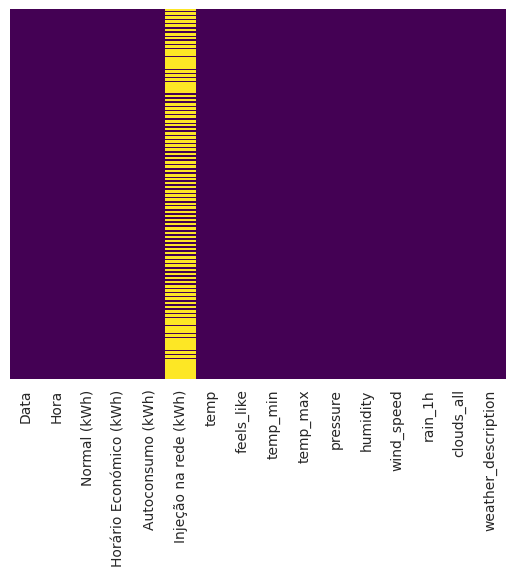

In [22]:
sns.heatmap(em1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### Lidar com datas

In [23]:
emd = em1.copy()
emd['Data'].head()

0    2021-09-29
1    2021-09-29
2    2021-09-29
3    2021-09-29
4    2021-09-29
Name: Data, dtype: object

In [25]:
emd['Data'] = pd.to_datetime(emd['Data'], format='%Y-%m-%d', errors='coerce')

In [26]:
emd['date_year'] = emd['Data'].dt.year
emd['date_month'] = emd['Data'].dt.month
emd['date_day'] = emd['Data'].dt.day
emd['date_hour'] = emd['Hora']
emd.head()

,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,date_year,date_month,date_day,date_hour
0,2021-09-29,0,0.0,0.0,0.0,NaN,13.97,13.54,11.45,14.04,1027,81,1.96,0.0,87,overcast clouds,2021,9,29,0
1,2021-09-29,1,0.0,0.0,0.0,NaN,13.48,13.02,13.43,13.90,1028,82,1.83,0.0,91,overcast clouds,2021,9,29,1
2,2021-09-29,2,0.0,0.0,0.0,NaN,12.93,12.47,12.72,13.43,1027,84,1.96,0.0,93,overcast clouds,2021,9,29,2
3,2021-09-29,3,0.0,0.0,0.0,NaN,12.61,12.15,10.34,12.93,1027,85,1.85,0.0,95,overcast clouds,2021,9,29,3
4,2021-09-29,4,0.0,0.0,0.0,NaN,12.61,12.17,9.79,12.93,1027,86,1.83,0.0,93,overcast clouds,2021,9,29,4


In [27]:
emd.drop('Data', axis=1, inplace=True)
emd.drop('Hora', axis=1, inplace=True)

In [28]:
emd.nunique()

Normal (kWh)               1282
Horário Económico (kWh)     851
Autoconsumo (kWh)           752
Injeção na rede (kWh)         4
temp                       2382
feels_like                 2670
temp_min                    481
temp_max                    545
pressure                     41
humidity                     82
wind_speed                  771
rain_1h                     368
clouds_all                  101
weather_description           8
date_year                     2
date_month                   12
date_day                     31
date_hour                    24
dtype: int64

### Tratamento de dados categóricos

In [30]:
em1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
 6   temp                     11016 non-null  float64
 7   feels_like               11016 non-null  float64
 8   temp_min                 11016 non-null  float64
 9   temp_max                 11016 non-null  float64
 10  pressure                 11016 non-null  int64  
 11  humidity                 11016 non-null  int64  
 12  wind_speed               11016 non-null  float64
 13  rain_1h                  11016 non-null  float64
 14  clouds_all            

In [31]:
em1['weather_description'].value_counts()

weather_description
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

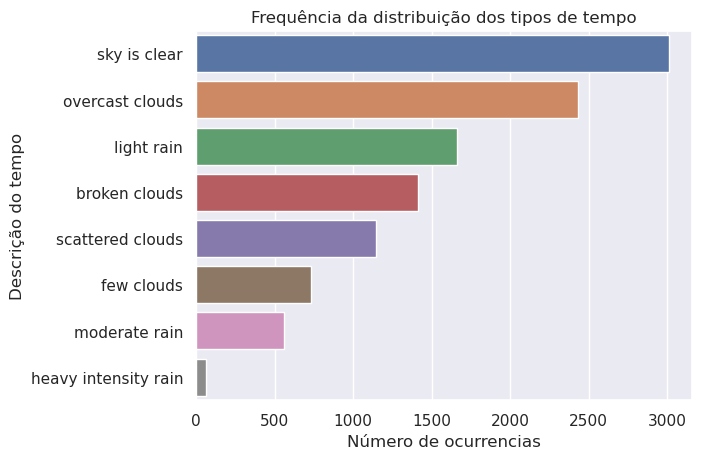

In [35]:
weather_count = em1['weather_description'].value_counts()
sns.set(style='darkgrid')
sns.barplot(y=weather_count.index, x=weather_count.values)
plt.title('Frequência da distribuição dos tipos de tempo')
plt.xlabel('Número de ocurrencias', fontsize=12)
plt.ylabel('Descrição do tempo', fontsize=12)
plt.show()

In [32]:
em1['Injeção na rede (kWh)'].value_counts()

Injeção na rede (kWh)
High         1103
Medium       1098
Very High     606
Low           432
Name: count, dtype: int64

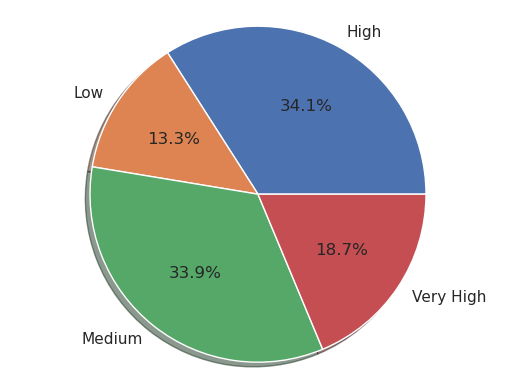

In [38]:
labels = em1['Injeção na rede (kWh)'].astype('category').cat.categories.tolist()
counts = em1['Injeção na rede (kWh)'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

## Análise exploratoria de dados